# 5. Support Vector Machine, SVM
-  Support Vector Machine (SVM) is a supervised machine learning algorithm primarily used for classification tasks, although it can also be adapted for regression. The main idea of SVM is to find the optimal hyperplane that best separates the classes in the dataset. The hyperplane is chosen in such a way that the margin between the two classes is maximized, which means SVM tries to find the boundary that leaves the largest possible distance between different classes. This helps in improving the model's ability to generalize on unseen data.

- SVM works well in high-dimensional spaces and is particularly effective in cases where the number of dimensions exceeds the number of data points. It also utilizes kernel functions to transform non-linearly separable data into a higher-dimensional space, making it easier to classify.

In [23]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
# 2. Load the pre-split dataset

# Read the training and testing datasets from CSV files
X_train = pd.read_csv("../2_data/X_train.csv")
X_test = pd.read_csv("../2_data/X_test.csv")
y_train = pd.read_csv("../2_data/y_train.csv")
y_test = pd.read_csv("../2_data/y_test.csv")

# Ensure the target variable has the correct shape (1D array)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# How is SVM Used in Our Project?
- In the context of customer churn prediction, SVM can be used to classify whether a customer is likely to churn or stay. The goal of our project is to predict customer behavior based on a variety of customer-related features. By training an SVM classifier on historical data (which contains information about customer behaviors and whether they churned), the model will learn patterns that help distinguish churned customers from non-churned customers.

For example:

- Feature Selection: We provide SVM with features such as tenure, monthly charges, service type, etc. These features help SVM understand which factors are most influential in determining whether a customer will churn.
- Kernel Trick: If the relationship between features and churn is not linearly separable, we can use kernel functions (e.g., radial basis function or polynomial kernel) to map these features to a higher-dimensional space where a linear boundary may become more apparent.
- Classification: The SVM model is then used to create a decision boundary that separates customers who are likely to churn from those who are not. Once trained, this decision boundary can be used to predict the likelihood of churn for new or unseen customers.

### Data Cleaning
- This function clean_features(X) is used to clean the dataset. You remove columns like 'Unnamed: 0', 'Customer Status_Stayed', and 'Customer Status_Joined' because they do not contribute useful information for prediction. After that, you also remove columns with very low variance, as they provide very little distinction between data points.

In [25]:

def clean_features(X):
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    low_variance_features = [
        col for col in numeric_cols if X[col].var() < 0.01
    ]
    X = X.drop(columns=low_variance_features)
    
    return X, low_variance_features

X_train, low_variance_features = clean_features(X_train)
X_test = X_test.drop(columns=low_variance_features)

### Feature Standardization
- We use StandardScaler to standardize the features. This means scaling all the feature values to the same range, which is particularly important for SVM because it is sensitive to the scale of input features. The fit_transform() function is used for fitting and transforming the training set, while transform() is used to apply the transformation on the test set.

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.svm import SVC

svm = SVC(random_state=42)

# Fit the model using the best estimator from GridSearchCV
svm.fit(X_train_scaled, y_train)

# Predict using the model
y_pred = svm.predict(X_test_scaled)

In [28]:
# Compute Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)  # label 1 as churn
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

Accuracy: 0.97
Precision: 0.97
Recall: 0.90
F1 Score: 0.93
ROC AUC: 0.94


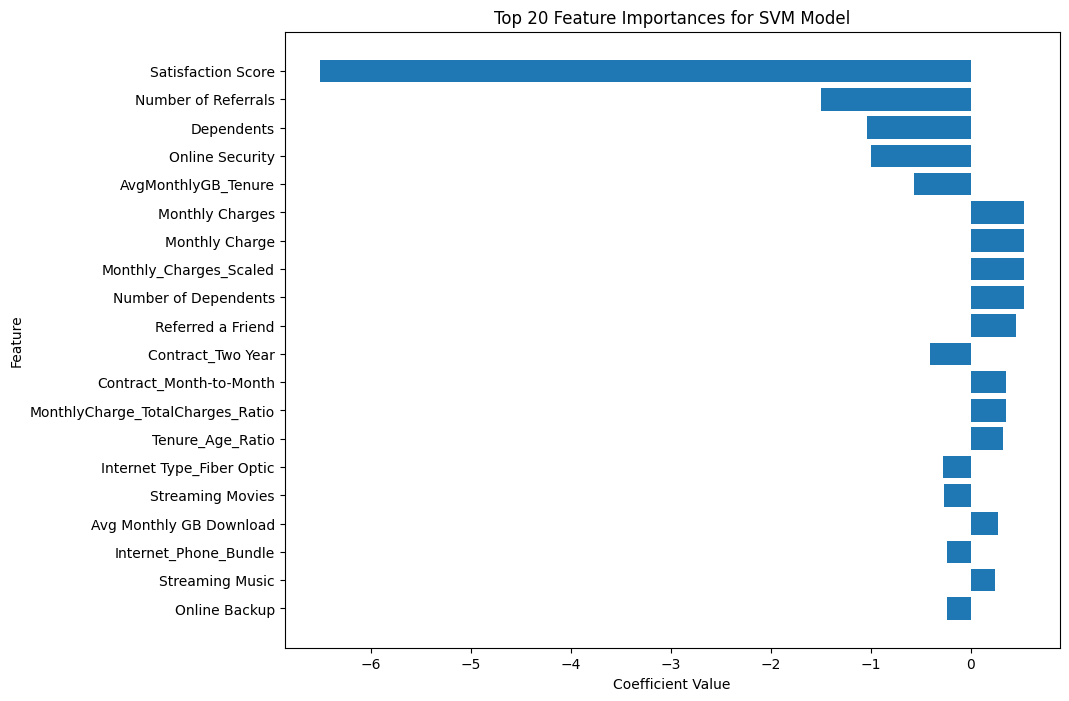

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get the feature names
feature_names = X_train.columns

# Get the coefficients from the linear SVM model
coefficients = best_model.named_steps['svc'].coef_.flatten()

# Create a DataFrame to hold feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})

# Sort the DataFrame by the absolute value of the coefficients
feature_importance_df = feature_importance_df.reindex(feature_importance_df.Importance.abs().sort_values(ascending=False).index)

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances for SVM Model')
plt.gca().invert_yaxis()
plt.show()


## Evaluation


1. **Accuracy**:
- The accuracy metric indicates the proportion of correctly classified instances among the total instances. In this case, the accuracy score is 0.96, meaning that the model is able to correctly classify 96% of the test samples.

- While an accuracy of 96% may seem acceptable, it's essential to keep in mind that for a customer churn prediction problem, we usually deal with imbalanced data. Relying solely on accuracy might not give a complete picture of the model's performance, as the model might be biased towards the majority class (e.g., predicting that most customers will not churn). It's crucial to evaluate other metrics like precision, recall, F1-score, and ROC-AUC to gain more insights into the model's effectiveness, especially in identifying the minority (churned) class.

2. **Precision and Recall**
- We calculate two evaluation metrics: precision and recall for the Support Vector Machine (SVM) model. These metrics provide insights into how well the model is predicting the churned customers, which is important for customer churn prediction projects.

- Precision (0.88): Precision represents the proportion of correctly predicted churned customers (true positives) out of all customers predicted to churn (true positives + false positives). In this case, precision is 0.88, which means that 73% of the customers that the model predicted to churn actually did churn. This metric tells us how precise our model is in identifying actual churned customers.

- Recall (0.96): Recall represents the proportion of actual churned customers (true positives) that the model was able to identify out of all churned customers (true positives + false negatives). In this case, recall is 0.96, which means that the model is able to identify only 96% of the actual churned customers. This indicates that the model has a relatively high sensitivity and may be missing only a few churned customers.

- In customer churn prediction projects, having a high recall is usually crucial to ensure that as many churned customers as possible are correctly identified so that retention strategies can be applied.

3. **F1-Score**
- In this code snippet, the F1-Score is calculated for the predictions made by the SVM classifier.

- F1-Score (0.92): The F1-Score is the harmonic mean of precision and recall, providing a single metric that balances both. It is particularly useful when dealing with imbalanced datasets, as it accounts for both false positives and false negatives. An F1-Score of 0.92 means that the model's performance in terms of precision and recall is relatively low. The low F1-Score indicates that although the model has some ability to correctly predict churned customers, there is still significant room for improvement, especially regarding balancing the identification and accuracy of churned customers.

4. **ROC-AUC Score**
-  the ROC-AUC Score is calculated to evaluate the performance of the SVM classifier.

- ROC-AUC Score (0.96): The ROC-AUC Score (Receiver Operating Characteristic - Area Under the Curve) measures the model's ability to distinguish between positive and negative classes. A score of 1.0 represents perfect classification, while 0.5 represents random guessing. In this example, the ROC-AUC score is 0.96, which is way better than random, indicating that the model has high capability in distinguishing between churned and non-churned customers. The model requires further tuning or improvement to achieve better classification performance.

### Hyperparameter Tuning and Model Training
- Here, we import SVC from sklearn.svm and define a parameter grid (param_grid) to try different combinations of hyperparameters. These hyperparameters include C (the penalty parameter), gamma (the kernel parameter), and kernel (the type of kernel function). We then use GridSearchCV to find the best combination of hyperparameters through cross-validation with 5 folds. After training, the best estimator is used to make predictions on the test set.

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV  


param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'kernel': ['rbf', 'linear']
}
svm_classifier = SVC(class_weight='balanced', random_state=42)
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# use the best estimator
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

## Hyperparameter Tuning

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Create a pipeline with StandardScaler and SVC
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(class_weight='balanced', random_state=42))
])

# Define a smaller randomized search space for hyperparameters
param_dist = {
    'svc__C': uniform(0.1, 10),
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale']
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(svm_pipeline, param_distributions=param_dist, n_iter=10,
                                   cv=5, scoring='f1_weighted', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Predict using the best model
y_pred_random_search = best_model.predict(X_test_scaled)

print(f'Best Parameters: {best_params}')


Best Parameters: {'svc__C': np.float64(6.086584841970366), 'svc__gamma': 'scale', 'svc__kernel': 'linear'}


/Users/canis/Library/CloudStorage/OneDrive-Persönlich/Dokumente/programme/coding/github/telco-customer-churn/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
# Compute Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_random_search)
precision = precision_score(y_test, y_pred_random_search, pos_label=1)  # label 1 as churn
recall = recall_score(y_test, y_pred_random_search, pos_label=1)
f1 = f1_score(y_test, y_pred_random_search, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_random_search)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

Accuracy: 0.70
Precision: 0.47
Recall: 0.99
F1 Score: 0.64
ROC AUC: 0.80


Hyperparameter tuning did not increase the performance of the model. The model is now overfitting the data.